In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\sales_data_Cleaned.csv")

In [3]:
df['Location'].value_counts()

Location
L01    30000
L02    30000
L03    30000
L04    30000
L05    30000
L06    30000
L07    30000
L08    30000
L09    30000
L10    30000
Name: count, dtype: int64

In [3]:
df.sample(10)

,ProductID,Location,Date,UnitsSold,PromoCodeUsed
275570,P0460,L03,2024-02-20,4,Yes
105352,P0176,L06,2024-02-22,3,Yes
38138,P0064,L06,2024-02-08,1,Yes
100253,P0168,L01,2024-02-23,1,No
129915,P0217,L06,2024-01-16,4,No
37869,P0064,L02,2024-01-10,1,Yes
135984,P0227,L07,2024-01-25,5,No
268052,P0447,L08,2024-02-02,2,Yes
287687,P0480,L05,2024-02-17,3,No
196293,P0328,L02,2024-02-03,1,Yes


# Univariate Analysis

# PromoCode Used – Countplot

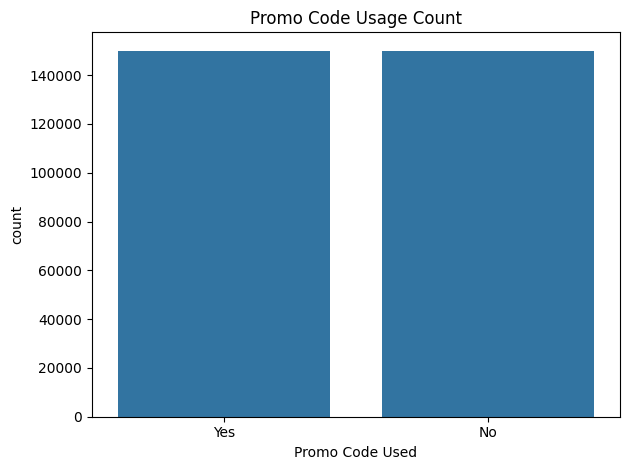

In [6]:
sns.countplot(data=df, x='PromoCodeUsed')
plt.title("Promo Code Usage Count")
plt.xlabel("Promo Code Used")
plt.tight_layout()
plt.show()


#  Location-wise Order Count

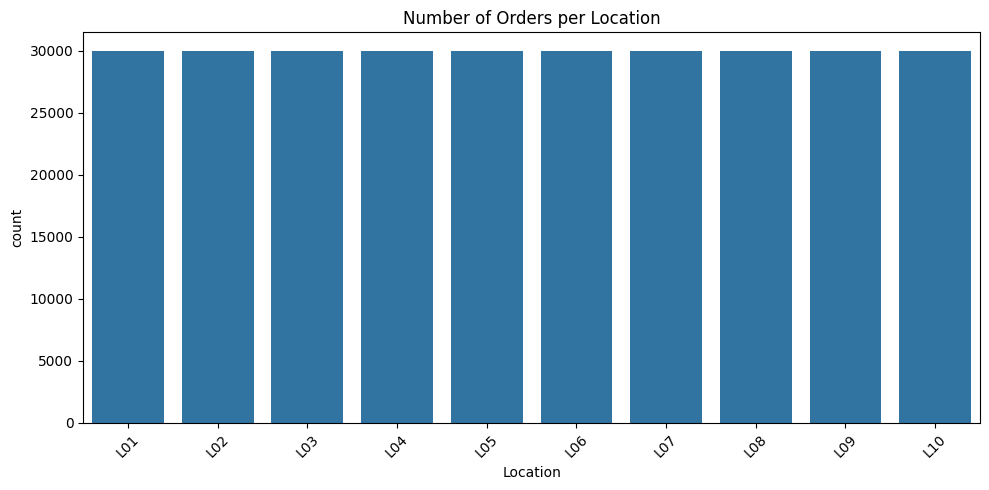

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title("Number of Orders per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
